In [779]:
import pandas as pd
import numpy as np
from collections import defaultdict
import string
import re
import nltk

In [780]:
df = pd.read_csv('DataScientist.csv',index_col=0) #index_col specifies the index column so the unnamed column doesnt appear
#df = df.drop("Job Description", axis=1)
df.head(10)





,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1
5,5,Data Scientist,$111K-$181K (Glassdoor est.),Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies\n2.9,"New York, NY","Hartford, CT",201 to 500 employees,1985,Company - Private,Insurance Carriers,Insurance,Unknown / Non-Applicable,"Colony Specialty, Markel, RLI",-1
6,6,Quantitative Researcher,$111K-$181K (Glassdoor est.),Experience: Entry-level (PhD Program) or Exper...,4.4,PDT Partners\n4.4,"New York, NY","New York, NY",51 to 200 employees,1993,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
7,7,Quantitative Research Associate,$111K-$181K (Glassdoor est.),Seeking a quant to work with senior researcher...,-1.0,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
8,8,AI Scientist,$111K-$181K (Glassdoor est.),Paige is a software company helping pathologis...,5.0,Paige\n5.0,"New York, NY","New York, NY",1 to 50 employees,2018,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,True
9,9,Quantitative Researcher,$111K-$181K (Glassdoor est.),"About the Position\n\n\nAt Jane Street, we con...",4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1


In [781]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3909 non-null   int64  
 1   Job Title          3909 non-null   object 
 2   Salary Estimate    3909 non-null   object 
 3   Job Description    3909 non-null   object 
 4   Rating             3909 non-null   float64
 5   Company Name       3909 non-null   object 
 6   Location           3909 non-null   object 
 7   Headquarters       3909 non-null   object 
 8   Size               3909 non-null   object 
 9   Founded            3909 non-null   int64  
 10  Type of ownership  3909 non-null   object 
 11  Industry           3909 non-null   object 
 12  Sector             3909 non-null   object 
 13  Revenue            3909 non-null   object 
 14  Competitors        3909 non-null   object 
 15  Easy Apply         3909 non-null   object 
dtypes: float64(1), int64(2),

In [782]:
def convert_String_to_Bool(entry):
    """Converting column to bool values in column "Easy Apply"

    Args:
        entry (str): column consisted of strings 

    Returns:
        bool : bool type column
    """
    
    if entry == "-1":
        return False
    return True

df["Easy Apply"] = df["Easy Apply"].apply(lambda x : convert_String_to_Bool(x))
df["Easy Apply"].value_counts()

False    3745
True      164
Name: Easy Apply, dtype: int64

In [783]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3909 non-null   int64  
 1   Job Title          3909 non-null   object 
 2   Salary Estimate    3909 non-null   object 
 3   Job Description    3909 non-null   object 
 4   Rating             3909 non-null   float64
 5   Company Name       3909 non-null   object 
 6   Location           3909 non-null   object 
 7   Headquarters       3909 non-null   object 
 8   Size               3909 non-null   object 
 9   Founded            3909 non-null   int64  
 10  Type of ownership  3909 non-null   object 
 11  Industry           3909 non-null   object 
 12  Sector             3909 non-null   object 
 13  Revenue            3909 non-null   object 
 14  Competitors        3909 non-null   object 
 15  Easy Apply         3909 non-null   bool   
dtypes: bool(1), float64(1), 

In [784]:

df.replace((['-1',"-1.0",-1]), [np.nan,np.nan,np.nan], inplace=True) # by looking at the data set we can tell that -1 is a replacment for a None value so were changing all -1 to NaN

In [785]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,NaN,False
1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,NaN,False
2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,Unknown / Non-Applicable,NaN,True
3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",False
4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",False


In [786]:
df.isnull().sum()

#df.info()

index                   0
Job Title               0
Salary Estimate         0
Job Description         0
Rating                409
Company Name            0
Location                0
Headquarters          240
Size                  229
Founded               977
Type of ownership     229
Industry              546
Sector                546
Revenue               229
Competitors          2760
Easy Apply              0
dtype: int64

In [787]:
def salary_parser_min(salary_string: str):
  """Creating a new column for minimum salary

  Args:
      salary_string (str): Salary Estitmate column which we are splitting into 2 new columns being minimum and maximum

  Returns:
      str : returns the first column after splitting the args column
  """
  salary_split = salary_string.split()
  salary = salary_split[0]
  del salary_split
  salary = salary.replace("K", "")
  salary = salary.replace("$", "")
  salary_range = salary.split("-")
  return salary_range[0]

df["Minimum Salary"] = df["Salary Estimate"].apply(lambda x : salary_parser_min(x))
#df["Minimum Salary"] = df["Minimum Salary"].astype(int)

df["Minimum Salary"].value_counts()




46     149
39     127
55     124
74     120
93     101
      ... 
59      12
17      11
66       9
10       3
146      3
Name: Minimum Salary, Length: 82, dtype: int64

In [788]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3909 non-null   int64  
 1   Job Title          3909 non-null   object 
 2   Salary Estimate    3909 non-null   object 
 3   Job Description    3909 non-null   object 
 4   Rating             3500 non-null   float64
 5   Company Name       3909 non-null   object 
 6   Location           3909 non-null   object 
 7   Headquarters       3669 non-null   object 
 8   Size               3680 non-null   object 
 9   Founded            2932 non-null   float64
 10  Type of ownership  3680 non-null   object 
 11  Industry           3363 non-null   object 
 12  Sector             3363 non-null   object 
 13  Revenue            3680 non-null   object 
 14  Competitors        1149 non-null   object 
 15  Easy Apply         3909 non-null   bool   
 16  Minimum Salary     3909 

In [790]:
def salary_parser_max(salary_string: str):
  """Creating a new column for maximum salary

  Args:
      salary_string (str): Salary Estitmate column which we are splitting into 2 new columns being minimum and maximum

  Returns:
      str : returns the second column after splitting the args column
  """
  salary_split = salary_string.split()
  salary = salary_split[0]
  del salary_split
  salary = salary.replace("K", "")
  salary = salary.replace("$", "")
  salary = salary.replace("(Employer","")
  salary_range = salary.split("-")
  return salary_range[-1]

df["Maximum Salary"] = df["Salary Estimate"].apply(lambda x : salary_parser_max(x))
df["Maximum Salary"] = df["Maximum Salary"].astype(float)

df["Minimum Salary"].value_counts()



46     149
39     127
55     124
74     120
93     101
      ... 
59      12
17      11
66       9
10       3
146      3
Name: Minimum Salary, Length: 82, dtype: int64

In [ ]:
df.drop('Salary Estimate',axis = 1,inplace = True)
df['Company Name'] = df['Company Name'].str.replace('\n.*', ' ',regex=True) #removing \n. from the column "company name"
#df['Est_Salary']= (df['Minimum Salary']+df['Maximum Salary'])/2

In [ ]:
df["Location"].head(10)

0     New York, NY
1     New York, NY
2     New York, NY
3    Lyndhurst, NJ
4     New York, NY
5     New York, NY
6     New York, NY
7     New York, NY
8     New York, NY
9     New York, NY
Name: Location, dtype: object

In [ ]:

def spliting_location_and_HQ (entry : object, geo_type : str) -> str:
    """Splits the location and HQ column to a city column and a state column.

    Args:
        entry (object,str): Location column we want to split. 2nd argument is either "city" or "state"

    Returns:
        str: returns either a locaton_city, locaton_state, HQ_city or HQ_state column
    """
    entry = str(entry)
    
    if entry == "nan":
        return None
    entry = entry.replace(" ", "")
    location_HQ_split = entry.split(",")
    location_HQ_city_state = location_HQ_split
    if geo_type == "city":
        return location_HQ_city_state[0]
    else:
        return location_HQ_city_state[1]


df["Location_City"]=df["Location"].apply(lambda x: spliting_location_and_HQ(x,"city"))
df["Location_State"]=df["Location"].apply(lambda x: spliting_location_and_HQ(x,"state"))
df["HQ_City"]=df["Headquarters"].apply(lambda x: spliting_location_and_HQ(x,"city"))
df["HQ_State"]=df["Headquarters"].apply(lambda x: spliting_location_and_HQ(x,"state"))

df.head()

    

,index,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Sector,Revenue,Competitors,Easy Apply,Minimum Salary,Maximum Salary,Location_City,Location_State,HQ_City,HQ_State
0,0,Senior Data Scientist,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,...,Travel & Tourism,Unknown / Non-Applicable,NaN,False,111,181,NewYork,NY,Montreal,Canada
1,1,"Data Scientist, Product Analytics","At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,...,Consumer Services,Unknown / Non-Applicable,NaN,False,111,181,NewYork,NY,NewYork,NY
2,2,Data Science Manager,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,...,NaN,Unknown / Non-Applicable,NaN,True,111,181,NewYork,NY,NewYork,NY
3,3,Data Analyst,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,...,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",False,111,181,Lyndhurst,NJ,Lyndhurst,NJ
4,4,"Director, Data Science","Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,...,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",False,111,181,NewYork,NY,NewYork,NY


In [ ]:
def splitting_department_from_job_title (entry : str, key_word : str) -> str:
    """Splitting Department from Job title in the column "Job Title"
    
    Args:
        entry (str, str): parse the column as an str, 2nd argument is either job_title or department.
    Returns:
        str: returns a new column at the end of the dataset
    """
    
    department_job_title = entry.split(",")
    job_title = department_job_title[0]
    department = department_job_title[-1]
    if key_word == "Job Title":
        return job_title
    else:
        
        return department

df["Department"] = df["Job Title"].apply(lambda x: splitting_department_from_job_title(x,"department"))    
df["Job Title"] = df["Job Title"].apply(lambda x: splitting_department_from_job_title(x,"Job Title"))
df["Job_title"] = df["Job Title"]
df.drop("Job Title",axis=1, inplace=True)


    
    

In [ ]:
df.head()

,index,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,Competitors,Easy Apply,Minimum Salary,Maximum Salary,Location_City,Location_State,HQ_City,HQ_State,Department,Job_title
0,0,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,...,NaN,False,111,181,NewYork,NY,Montreal,Canada,Senior Data Scientist,Senior Data Scientist
1,1,"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",...,NaN,False,111,181,NewYork,NY,NewYork,NY,Product Analytics,Data Scientist
2,2,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,...,NaN,True,111,181,NewYork,NY,NewYork,NY,Data Science Manager,Data Science Manager
3,3,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,...,"Zocdoc, Healthgrades",False,111,181,Lyndhurst,NJ,Lyndhurst,NJ,Data Analyst,Data Analyst
4,4,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,...,"BBDO, Grey Group, Droga5",False,111,181,NewYork,NY,NewYork,NY,Data Science,Director


In [ ]:
df["Job_title"].value_counts()

Data Scientist                                       335
Data Engineer                                        268
Data Analyst                                         264
Senior Data Scientist                                104
Senior Data Analyst                                   52
                                                    ... 
Principal Device Modeling Engineer                     1
SQL/SAS Data Analyst                                   1
Marketing Data Analyst Coordinator                     1
Greenplum /Big Data Engineer/Architect                 1
Patient Safety Physician or Safety Scientist - UK      1
Name: Job_title, Length: 1797, dtype: int64

In [ ]:
df["Job_title"] = df["Job_title"].str.replace(" â","")
df["Job_title"] = df["Job_title"].str.replace("/","|")
#a


In [ ]:
df["Revenue"].value_counts()

Unknown / Non-Applicable            1163
$10+ billion (USD)                   599
$100 to $500 million (USD)           338
$50 to $100 million (USD)            214
$2 to $5 billion (USD)               211
$10 to $25 million (USD)             191
$1 to $2 billion (USD)               180
$1 to $5 million (USD)               170
$25 to $50 million (USD)             143
$5 to $10 billion (USD)              133
Less than $1 million (USD)           124
$500 million to $1 billion (USD)     114
$5 to $10 million (USD)              100
Name: Revenue, dtype: int64

In [ ]:

df["Revenue"] = df["Revenue"].replace("Unknown / Non-Applicable",np.nan)
df['Revenue'] = df['Revenue'].str.replace('$', ' ',regex=True)
df['Revenue'] = df['Revenue'].str.replace('(USD)', ' ',regex=True)
df['Revenue'] = df['Revenue'].str.replace('(', ' ',regex=True)
df['Revenue'] = df['Revenue'].str.replace(')', ' ',regex=True)
df['Revenue'] = df['Revenue'].str.replace(' ', '',regex=True)
df['Revenue'] = df['Revenue'].str.replace('+', '',regex=True)
df['Revenue'] = df['Revenue'].str.replace('2to5billion', '2billionto5billion')
df['Revenue'] = df['Revenue'].str.replace('5to10billion ', '5billionto10billion')
df['Revenue'] = df['Revenue'].replace('million', ' ')
df['Revenue'] = df['Revenue'].replace('10billion', '10billionto11billion')
df['Revenue'] = df['Revenue'].str.replace('Lessthan1million', '0millionto1million')
df['Revenue'] = df['Revenue'].str.replace('million', ' ')
df['Revenue'] = df['Revenue'].str.replace('billion', '000 ')
df["Revenue"] = df["Revenue"].str.replace(" to","to")

In [ ]:
df["Revenue"].value_counts()

10000to11000     599
100to500         338
50to100          214
2000to5000       211
10to25           191
1to2000          180
1to5             170
25to50           143
5to10000         133
0to1             124
500to1000        114
5to10            100
Name: Revenue, dtype: int64

In [ ]:
def splitting_revenue(entry: object, key_word: str) -> str:
    """splits the revenue to a max and a min revenue column

    Args:
        entry (object), key_word (str): Revenue column 

    Returns:
        str: returns either a minimum or maximum column dependent on key_word
    """
    entry = str(entry)
    
    if entry == "nan":
        return None
    min_max = entry.split("to")
    if key_word == "min":
        return min_max[0]
    else:
        return min_max[-1]
    
df["min_revenue_in_milions"]=df["Revenue"].apply(lambda x: splitting_revenue(x,"min"))
df["max_revenue_in_milions"]=df["Revenue"].apply(lambda x: splitting_revenue(x,"max"))
df.drop("Revenue",axis=1,inplace=True)
    

In [ ]:
df["min_revenue_in_milions"].value_counts()

10000    599
1        350
100      338
5        233
50       214
2000     211
10       191
25       143
0        124
500      114
Name: min_revenue_in_milions, dtype: int64

In [ ]:

df.head(10)

,index,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,Minimum Salary,Maximum Salary,Location_City,Location_State,HQ_City,HQ_State,Department,Job_title,min_revenue_in_milions,max_revenue_in_milions
0,0,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,...,111,181,NewYork,NY,Montreal,Canada,Senior Data Scientist,Senior Data Scientist,None,None
1,1,"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",...,111,181,NewYork,NY,NewYork,NY,Product Analytics,Data Scientist,None,None
2,2,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,...,111,181,NewYork,NY,NewYork,NY,Data Science Manager,Data Science Manager,None,None
3,3,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,...,111,181,Lyndhurst,NJ,Lyndhurst,NJ,Data Analyst,Data Analyst,None,None
4,4,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,...,111,181,NewYork,NY,NewYork,NY,Data Science,Director,None,None
5,5,Job Brief\n\nThe ideal candidate will have pre...,2.9,IFG Companies,"New York, NY","Hartford, CT",201 to 500 employees,1985.0,Company - Private,Insurance Carriers,...,111,181,NewYork,NY,Hartford,CT,Data Scientist,Data Scientist,None,None
6,6,Experience: Entry-level (PhD Program) or Exper...,4.4,PDT Partners,"New York, NY","New York, NY",51 to 200 employees,1993.0,Company - Private,Investment Banking & Asset Management,...,111,181,NewYork,NY,NewYork,NY,Quantitative Researcher,Quantitative Researcher,None,None
7,7,Seeking a quant to work with senior researcher...,NaN,Enlightenment Research,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,...,111,181,NewYork,NY,NewYork,NY,Quantitative Research Associate,Quantitative Research Associate,None,None
8,8,Paige is a software company helping pathologis...,5.0,Paige,"New York, NY","New York, NY",1 to 50 employees,2018.0,Company - Private,Enterprise Software & Network Solutions,...,111,181,NewYork,NY,NewYork,NY,AI Scientist,AI Scientist,None,None
9,9,"About the Position\n\n\nAt Jane Street, we con...",4.8,Jane Street,"New York, NY","New York, NY",501 to 1000 employees,2000.0,Company - Private,Investment Banking & Asset Management,...,111,181,NewYork,NY,NewYork,NY,Quantitative Researcher,Quantitative Researcher,None,None


In [ ]:
df["min_revenue_in_milions"].value_counts()

10000    599
1        350
100      338
5        233
50       214
2000     211
10       191
25       143
0        124
500      114
Name: min_revenue_in_milions, dtype: int64

In [ ]:
df["HQ_State"] = df["HQ_State"].str.replace("Sweden","SWE")
df["HQ_State"] = df["HQ_State"].str.replace("Belgium","BE")
df["HQ_State"] = df["HQ_State"].str.replace("Iran","IR")
df["HQ_State"] = df["HQ_State"].str.replace("United Kingdom","UK")

In [ ]:
df["Founded"] = df["Founded"].astype("Int32") #rounding to a 32 bit so the year in the column looks nicer


In [ ]:
df["Company Name"] = df["Company Name"].astype(str)


In [ ]:
for i in df.index: #fixing the index column to align the  default index
    df.loc[i,"index"] = i
        

In [ ]:
df["Type of ownership"] = df["Type of ownership"].str.replace("/","|")

In [ ]:
df["Size"].value_counts()

10000+ employees           993
51 to 200 employees        563
1001 to 5000 employees     553
1 to 50 employees          550
201 to 500 employees       418
501 to 1000 employees      307
5001 to 10000 employees    219
Unknown                     77
Name: Size, dtype: int64

In [ ]:
df["Size"] = df["Size"].str.replace("employees","",regex=True)
df["Size"] = df["Size"].str.replace("+","to10001",regex=True)
df["Size"] = df["Size"].str.replace(" ","",regex=True)
df["Size"] = df["Size"].replace("Unknown",np.nan)


In [ ]:
df["min_size_emp"]=df["Size"].apply(lambda x: splitting_revenue(x,"min")) #using splitting_revenue method to split size aswell since they have the same deno.
df["max_size_emp"]=df["Size"].apply(lambda x: splitting_revenue(x,"max")) 
df.drop("Size",axis=1,inplace=True)



In [ ]:
df.head()

,index,Job Description,Rating,Company Name,Location,Headquarters,Founded,Type of ownership,Industry,Sector,...,Location_City,Location_State,HQ_City,HQ_State,Department,Job_title,min_revenue_in_milions,max_revenue_in_milions,min_size_emp,max_size_emp
0,0,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper,"New York, NY","Montreal, Canada",2007,Company - Private,Travel Agencies,Travel & Tourism,...,NewYork,NY,Montreal,Canada,Senior Data Scientist,Senior Data Scientist,None,None,501,1000
1,1,"At Noom, we use scientifically proven methods ...",4.5,Noom US,"New York, NY","New York, NY",2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,...,NewYork,NY,NewYork,NY,Product Analytics,Data Scientist,None,None,1001,5000
2,2,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",<NA>,Unknown,NaN,NaN,...,NewYork,NY,NewYork,NY,Data Science Manager,Data Science Manager,None,None,1,50
3,3,Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital,"Lyndhurst, NJ","Lyndhurst, NJ",2019,Company - Private,Internet,Information Technology,...,Lyndhurst,NJ,Lyndhurst,NJ,Data Analyst,Data Analyst,None,None,201,500
4,4,"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group,"New York, NY","New York, NY",2007,Company - Private,Advertising & Marketing,Business Services,...,NewYork,NY,NewYork,NY,Data Science,Director,None,None,51,200


In [ ]:
df["Job Description"].head(10)

0    ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...
1    At Noom, we use scientifically proven methods ...
2    Decode_M\n\nhttps://www.decode-m.com/\n\nData ...
3    Sapphire Digital seeks a dynamic and driven mi...
4    Director, Data Science - (200537)\nDescription...
5    Job Brief\n\nThe ideal candidate will have pre...
6    Experience: Entry-level (PhD Program) or Exper...
7    Seeking a quant to work with senior researcher...
8    Paige is a software company helping pathologis...
9    About the Position\n\n\nAt Jane Street, we con...
Name: Job Description, dtype: object

In [ ]:
def cleaning_column (entry:str) -> str:
    """Cleans the text 

    Args:
        entry (str): takes in a column of text

    Returns:
        str: returns an all lowered text that is cleaned from special chars and common stopowords.
    """
    entry = entry.lower()
    entry = entry.replace(",","")
    entry = entry.replace("\n"," ")
    entry = entry.replace(".","")
    entry = entry.replace("/ ","")
    entry = entry.replace("/","|")
    entry = entry.replace("(","")
    entry = entry.replace(")","")
    entry = entry.replace("  "," ")
    entry = entry.replace(" and "," ")
    entry = entry.replace(" a "," ")
    entry = entry.replace(" the "," ")
    entry = entry.replace(" our "," ")
    entry = entry.replace(" we "," ")
    entry = entry.replace(" to "," ")
    entry = entry.replace(" of "," ")
    entry = entry.replace(" is "," ")
    entry = entry.replace(" in "," ")
    entry = entry.replace(" with "," ")
    entry = entry.replace(" as "," ")
    entry = entry.replace(" has "," ")
    entry = entry.replace(" you "," ")
    entry = entry.replace(" that "," ")
    entry = entry.replace(" are "," ")
    entry = entry.replace(" at "," ")
    entry = entry.replace(" like "," ")
    entry = entry.replace(" on "," ")
    entry = entry.replace(" about "," ")
    entry = entry.replace(" have "," ")
    entry = entry.replace(" us "," ")
    entry = entry.replace(" help "," ")
    entry = entry.replace(" for "," ")
    entry = entry.replace(" what "," ")
    entry = entry.replace(" real "," ")
    entry = entry.replace(" their "," ")
    entry = entry.replace(" new "," ")
    entry = entry.replace(" an "," ")
    entry = entry.replace(" or "," ")
    entry = entry.replace(" this "," ")
    entry = entry.replace(" in "," ")
    entry = entry.replace(" into "," ")
    entry = entry.replace("•"," ")
    entry = entry.replace(" will "," ")
    entry = entry.replace(" from "," ")
    entry = entry.replace(" be "," ")
    entry = entry.replace(" by "," ")
    
    
    #ne moze ovako, treba generalizirati, mozda rijeci vece od 3 uzeti u obzir
    
    
    
    
    return entry


In [ ]:
def word_frequency(text: str)-> dict:
    """takes in a column of text, and returns a dictionary of words sorted by frequency

    Args:
        text (str): sentences 

    Returns:
        dict: column of sorted dictionaries
    """
    
    words = text.split()
    frequency = {}
    for word in words:
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
    sorted_frequency = {k: v for k, v in sorted(frequency.items(), key=lambda item: item[1], reverse=True)} #sort by descending order
    return sorted_frequency


In [ ]:
from itertools import islice

def merge_dict_from_word_frequency (entry: dict) -> dict:
    """merges all rows from a column of dictionaries into a single dictionary

    Args:
        entry (dict): dictionary we want to merge

    Returns:
        dict: a single dictionary with combined values 
    """
    merged_dict = defaultdict(int)
    for d in entry:
        for key, value in d.items():
            merged_dict[key] += value

    new_frequency_sorted = {k: v for k, v in sorted(merged_dict.items(), key=lambda item: item[1], reverse=True)} #sorts the dict by descending order
    return new_frequency_sorted
    
def take(n :int, iterable: dict)->list:
    """Return the first n items of the iterable as a list.

    Args:
        n (int): number of words 
        iterable (dict): dictionary we want to return as a list

    Returns:
        list: first n items from the dict 
    """
    
    return list(islice(iterable, n))

def n_most_searched_words(entry):
    """this method only loops thru the list and prints the top n words searched

    Args:
        entry (list): list of items 
    """
    for item in entry:
         print(item[0])
            

#ideje
#spojiti sve ove metode da samo treba jednu funkciju pokrenuti (od kolone job title -> top 10 words)
#popraviti filtriranje da sam izabere koje ce char ukloniti mozda sve rijeci krace od 4 iskljuciti automatski, sve special chars


In [ ]:
df["Job Description"]=df["Job Description"].apply(lambda x: cleaning_column(x))
df['frequency'] = df["Job Description"].apply(word_frequency)
merged_sorted_freq = merge_dict_from_word_frequency(df["frequency"])
items = take(10, merged_sorted_freq.items())
n_most_searched_words(items)

data
experience
work
business
team
skills
development
years
science
other


In [791]:
df["Minimum Salary"] = df["Minimum Salary"].astype(float)
df["Maximum Salary"] = df["Maximum Salary"].astype(float)


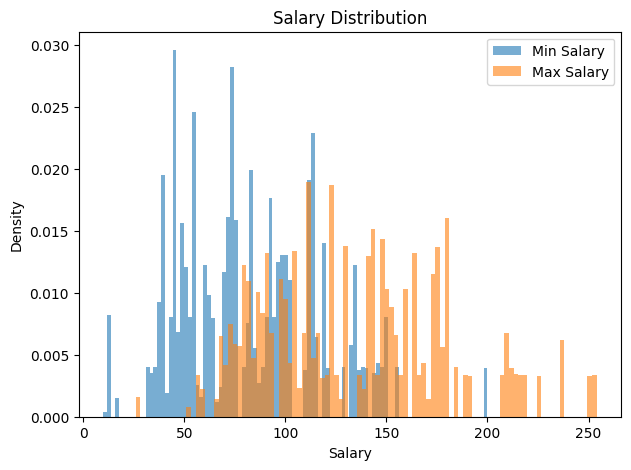

In [821]:
import matplotlib.pyplot as plt

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
kwargs = dict(alpha=0.6, bins=100, density=True, stacked=True)

# Plot Histogram 
x1 = df["Minimum Salary"]
x2 = df["Maximum Salary"]
plt.hist(x1,**kwargs, label="Min Salary")
plt.hist(x2,**kwargs, label="Max Salary")
plt.gca().set(title='Salary Distribution',xlabel="Salary", ylabel="Density")
plt.legend()
